In [42]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [5]:
df_val = pd.read_csv('/home/js/gwhd_2021-2/competition_val.csv')
df_train = pd.read_csv('/home/js/gwhd_2021-2/competition_train.csv')
df_val

,image_name,BoxesString,domain
0,00319488e879a811698174d9f26ef174f2f108a13e12ed...,756 850 930 1024;252 138 334 207;960 157 1024 ...,Utokyo_3
1,0045ab3d479309837ba595e10de6ef94aeddb15e8cc438...,768 814 824 883;446 886 577 1024;207 626 310 7...,Usask_1
2,004cf579e4a96bfadc9c626f4fc6f5270795d01f49b6f0...,990 69 1023 184;464 214 681 516;826 517 1023 6...,Utokyo_1
3,00b517a1161844d3002f32ed536ee95b70571a6f2a30f2...,439 933 518 1024;34 75 82 140;0 232 66 323;488...,UQ_6
4,00bb861c1f4e7dacc4f04ecd0092e348bc08d408d1d980...,290 0 366 154;41 758 171 851;960 134 1023 267;...,Utokyo_1
...,...,...,...
1471,fee2d476930b108a41ac978dc214f19c5330d98db68fab...,172 281 273 459;773 376 890 453;111 29 232 153...,Utokyo_1
1472,ff0d1f54cf2986633afe8613ba4df54525fcad4322040b...,199 797 303 896;710 534 806 622;0 270 89 397;8...,Utokyo_1
1473,ff0fafb5486a8f6e14a2be4717f4cf6fd61750315e0df2...,256 270 335 349;818 320 902 410;43 0 123 43;76...,Utokyo_1
1474,ff4ed1c667c2dc63561107432705e6b305a4baf431ed94...,375 194 441 265;623 234 701 288;225 802 283 86...,Utokyo_3


In [11]:
domain_to_ds_map = {
    'NAU_1' : 'Postflowering',
    'UQ_1' : 'Postflowering',
    'UQ_2' : 'Postflowering',
    'UQ_3' : 'Filling',
    'UQ_4' : 'Filling',
    'UQ_5' : 'Filling-ripening',
    'UQ_6' : 'Filling-ripening',
    'Usask_1' : 'Filling-ripening',
    'Utokyo_1' : 'Ripening',
    'Utokyo_2' : 'Ripening',
    'Utokyo_3' : 'Multiple'
}

In [12]:
np.unique(df_val['domain']), np.unique(df_train['domain'])

(array(['NAU_1', 'UQ_1', 'UQ_2', 'UQ_3', 'UQ_4', 'UQ_5', 'UQ_6', 'Usask_1',
        'Utokyo_1', 'Utokyo_2', 'Utokyo_3'], dtype=object),
 array(['Arvalis_1', 'Arvalis_10', 'Arvalis_11', 'Arvalis_12', 'Arvalis_2',
        'Arvalis_3', 'Arvalis_4', 'Arvalis_5', 'Arvalis_6', 'Arvalis_7',
        'Arvalis_8', 'Arvalis_9', 'ETHZ_1', 'Inrae_1', 'NMBU_1', 'NMBU_2',
        'Rres_1', 'ULiège-GxABT_1'], dtype=object))

In [30]:
for domain in domain_to_ds_map.keys():
    domain_df = df_val[df_val['domain'] == domain]
    path = os.path.join('/home/js/gwhd_2021-2', f"{domain}.csv")
    domain_df.to_csv(path)

In [32]:
mask = df_val['domain'] == 'NAU_1'
mask |= df_val['domain'] == 'UQ_1'
mask |= df_val['domain'] == 'UQ_2'
#postflowering_df = df_val[df_val['domain'] in ['NAU_1', 'UQ_1', 'UQ_2']]
postflowering_df = df_val[mask].reset_index().drop('index', axis=1)
path = os.path.join('/home/js/gwhd_2021-2', 'Postflowering_val.csv')
postflowering_df.to_csv(path)
postflowering_df.head()

,image_name,BoxesString,domain
0,051ae339c9f1c24246bea7d0bd81a1261efe121d80b260...,864 402 887 431;573 704 656 737;542 859 563 90...,UQ_1
1,0654f52111d7b7977eacec84160f03f55606726b3f7877...,999 390 1024 417;454 0 487 31;380 992 424 1024...,UQ_1
2,06b65f8a44209f43522658d4e45a35545a5cd9b6b19388...,33 285 64 324;470 29 510 60;538 5 558 47,UQ_1
3,12765e8e482e8169473736635366d935e6cec5de746821...,738 579 771 621;626 643 666 680;351 762 416 81...,NAU_1
4,12d67a51855f65e4c32f32b11415b17a45d7be8a7a5dcf...,no_box,UQ_2


In [35]:
df_val['devel_stage'] = df_val['domain'].map(domain_to_ds_map)
df_val

,image_name,BoxesString,domain,devel_stage
0,00319488e879a811698174d9f26ef174f2f108a13e12ed...,756 850 930 1024;252 138 334 207;960 157 1024 ...,Utokyo_3,Multiple
1,0045ab3d479309837ba595e10de6ef94aeddb15e8cc438...,768 814 824 883;446 886 577 1024;207 626 310 7...,Usask_1,Filling-ripening
2,004cf579e4a96bfadc9c626f4fc6f5270795d01f49b6f0...,990 69 1023 184;464 214 681 516;826 517 1023 6...,Utokyo_1,Ripening
3,00b517a1161844d3002f32ed536ee95b70571a6f2a30f2...,439 933 518 1024;34 75 82 140;0 232 66 323;488...,UQ_6,Filling-ripening
4,00bb861c1f4e7dacc4f04ecd0092e348bc08d408d1d980...,290 0 366 154;41 758 171 851;960 134 1023 267;...,Utokyo_1,Ripening
...,...,...,...,...
1471,fee2d476930b108a41ac978dc214f19c5330d98db68fab...,172 281 273 459;773 376 890 453;111 29 232 153...,Utokyo_1,Ripening
1472,ff0d1f54cf2986633afe8613ba4df54525fcad4322040b...,199 797 303 896;710 534 806 622;0 270 89 397;8...,Utokyo_1,Ripening
1473,ff0fafb5486a8f6e14a2be4717f4cf6fd61750315e0df2...,256 270 335 349;818 320 902 410;43 0 123 43;76...,Utokyo_1,Ripening
1474,ff4ed1c667c2dc63561107432705e6b305a4baf431ed94...,375 194 441 265;623 234 701 288;225 802 283 86...,Utokyo_3,Multiple


In [36]:
for ds in np.unique(df_val.devel_stage):
    ds_df = df_val[df_val['devel_stage'] == ds]
    path = os.path.join('/home/js/gwhd_2021-2', f"{ds}_val.csv")
    ds_df.to_csv(path)



In [71]:
x = [  'NAU_1',     'UQ_1', '     UQ_2',     'UQ_3', 'UQ_4',      'UQ_5',       'UQ_6',       'Usask_1',   'UTokyo_1', 'UTokyo_2', 'UTokyo_3']
y = [   0.665,      0.449,        0.578,     0.635,   0.667,      0.622,         0.635,         0.679,       0.874,      0.823,     0.521]
c = ['limegreen', 'limegreen', 'limegreen', 'green', 'green', 'yellowgreen', 'yellowgreen', 'yellowgreen',  'gold',     'gold',   'slategray']
counts =[20,          22,          16,         14,      30,         30,            30,            200,         538,        456,         120]

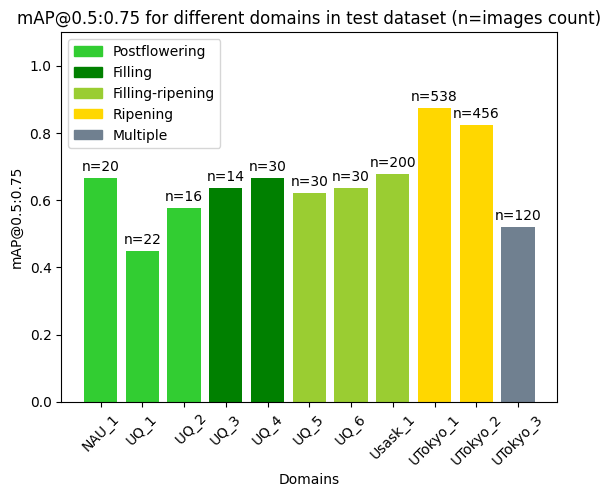

In [82]:
fig, ax = plt.subplots()
bars = ax.bar(x, y, color=c)
postflowering_handle = mpatches.Patch(color='limegreen', label='Postflowering')
filling_handle = mpatches.Patch(color='green', label='Filling')
filling_ripening_handle = mpatches.Patch(color='yellowgreen', label='Filling-ripening')
ripening_handle = mpatches.Patch(color='gold', label='Ripening')
multiple_handle = mpatches.Patch(color='slategray', label='Multiple')
plt.xticks(rotation=45)
plt.legend(handles=[postflowering_handle, filling_handle, filling_ripening_handle, ripening_handle, multiple_handle])
plt.ylim([0, 1.1])
plt.ylabel('mAP@0.5:0.75')
plt.xlabel('Domains')
plt.title('mAP@0.5:0.75 for different domains in test dataset (n=images count)')
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.annotate(f'n={count}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
    textcoords="offset points", ha='center', va='bottom')


In [88]:
losses_path = '/home/js/Documents/yolov7-train-results/losses/'
stock_yolov7_train_box_loss = pd.read_csv(os.path.join(losses_path, 'stock_yolov7_train_box_loss.csv'))
stock_yolov7_train_obj_loss = pd.read_csv(os.path.join(losses_path, 'stock_yolov7_train_obj_loss.csv'))
stock_yolov7_train_loss = stock_yolov7_train_box_loss['Value'] + stock_yolov7_train_obj_loss['Value']
stock_yolov7_train_loss.to_csv(os.path.join(losses_path, 'm9_train.csv'))

In [89]:
stock_yolov7_val_box_loss = pd.read_csv(os.path.join(losses_path, 'stock_yolov7_val_box_loss.csv'))
stock_yolov7_val_obj_loss = pd.read_csv(os.path.join(losses_path, 'stock_yolov7_val_obj_loss.csv'))
stock_yolov7_val_loss = stock_yolov7_val_box_loss['Value'] + stock_yolov7_val_obj_loss['Value']
stock_yolov7_val_loss.to_csv(os.path.join(losses_path, 'm9_eval.csv'))

In [91]:
stock_yolov7_e6e_train_box_loss = pd.read_csv(os.path.join(losses_path, 'stock_yolov7_e6e_train_box_loss.csv'))
stock_yolov7_e6e_train_obj_loss = pd.read_csv(os.path.join(losses_path, 'stock_yolov7_e6e_train_obj_loss.csv'))
stock_yolov7_e6e_train_loss = stock_yolov7_e6e_train_box_loss['Value'] + stock_yolov7_e6e_train_obj_loss['Value']
stock_yolov7_e6e_train_loss.to_csv(os.path.join(losses_path, 'm10_train.csv'))

In [92]:
stock_yolov7_e6e_val_box_loss = pd.read_csv(os.path.join(losses_path, 'stock_yolov7_e6e_val_box_loss.csv'))
stock_yolov7_e6e_val_obj_loss = pd.read_csv(os.path.join(losses_path, 'stock_yolov7_e6e_val_obj_loss.csv'))
stock_yolov7_e6e_val_loss = stock_yolov7_e6e_val_box_loss['Value'] + stock_yolov7_e6e_val_obj_loss['Value']
stock_yolov7_e6e_val_loss.to_csv(os.path.join(losses_path, 'm10_eval.csv'))

In [95]:
import re
losses_path = '/home/js/Documents/yolov7-train-results/losses/'
losses_filenames = os.listdir(losses_path)
losses_filenames = [name for name in losses_filenames if re.match(r"m\d_*", name)]
losses_filenames

['m10_eval.csv',
 'm5_eval.csv',
 'm4_eval.csv',
 'm8_train.csv',
 'm9_eval.csv',
 'm4_train.csv',
 'm6_eval.csv',
 'm3_eval.csv',
 'm8_eval.csv',
 'm10_train.csv',
 'm2_train.csv',
 'm3_train.csv',
 'm2_eval.csv',
 'm7_eval.csv',
 'm9_train.csv',
 'm6_train.csv',
 'm7_train.csv',
 'm5_train.csv']

In [119]:
train_losses = [name for name in losses_filenames if 'train' in name]
train_losses.sort()
train_losses.append(train_losses[0])
train_losses.pop(0)
train_losses

['m2_train.csv',
 'm3_train.csv',
 'm4_train.csv',
 'm5_train.csv',
 'm6_train.csv',
 'm7_train.csv',
 'm8_train.csv',
 'm9_train.csv',
 'm10_train.csv']

In [122]:
eval_losses = [name for name in losses_filenames if 'eval' in name]
eval_losses.sort()
eval_losses.append(eval_losses[0])
eval_losses.pop(0)
eval_losses

['m2_eval.csv',
 'm3_eval.csv',
 'm4_eval.csv',
 'm5_eval.csv',
 'm6_eval.csv',
 'm7_eval.csv',
 'm8_eval.csv',
 'm9_eval.csv',
 'm10_eval.csv']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


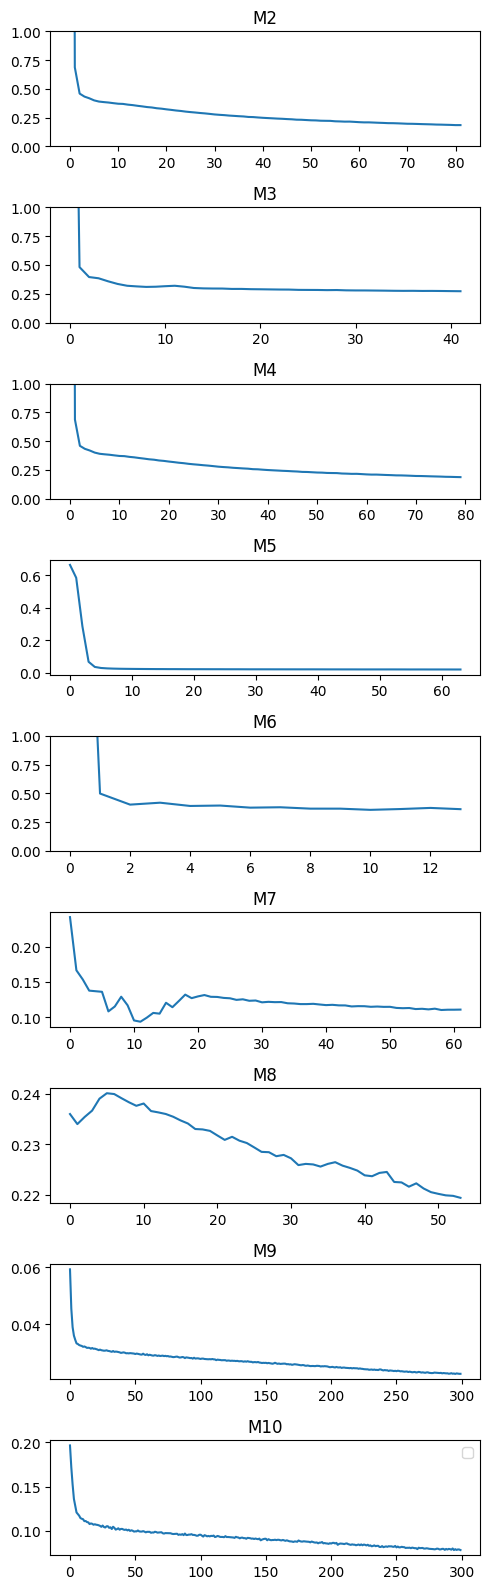

In [154]:
legend_titles = [title.split('_')[0].upper() for title in train_losses]
fig, axs = plt.subplots(len(legend_titles), figsize=(5, 16))
for i, loss in enumerate(train_losses):
    loss_vals = pd.read_csv(os.path.join(losses_path, loss))['Value']
    if i == 2:
        axs[i].plot(loss_vals[:80])
    else:
        axs[i].plot(loss_vals)
    if loss_vals.max() > 2:
        axs[i].set_ylim([0, 1])
    axs[i].set_title(legend_titles[i])
plt.legend()
plt.tight_layout()
#plt.ylim([0, 1])
#plt.xlim([-1, 100])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


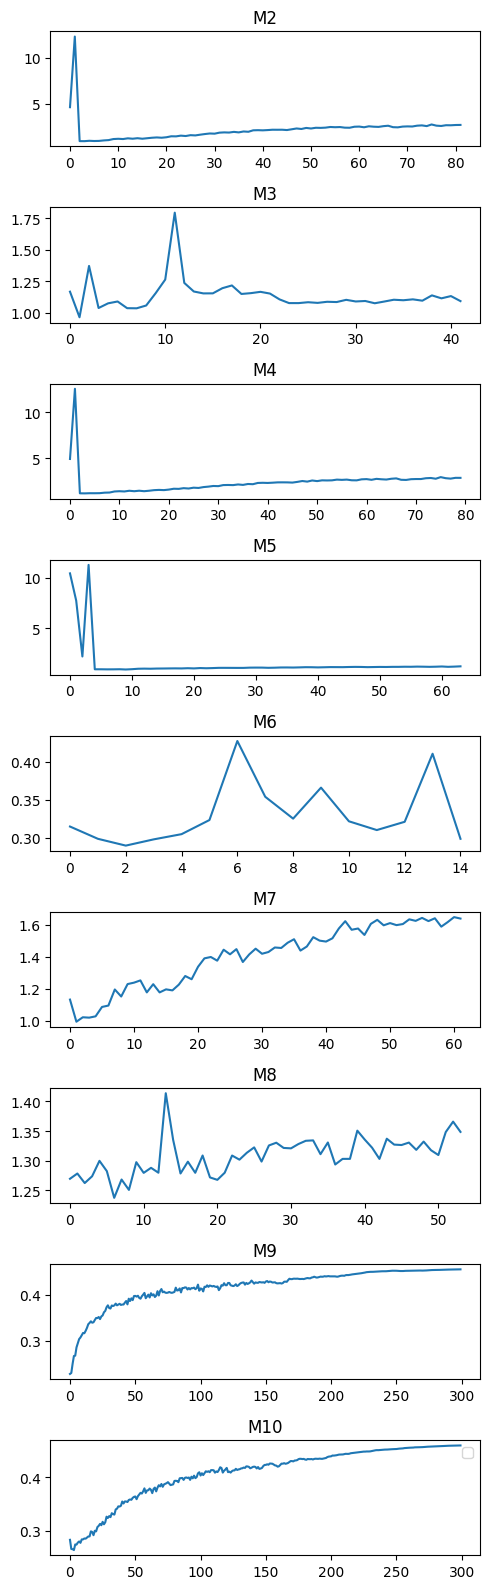

In [156]:
legend_titles = [title.split('_')[0].upper() for title in eval_losses]
fig, axs = plt.subplots(len(legend_titles), figsize=(5, 16))
for i, loss in enumerate(eval_losses):
    loss_vals = pd.read_csv(os.path.join(losses_path, loss))['Value']
    if i == 2:
        axs[i].plot(loss_vals[:80])
    else:
        axs[i].plot(loss_vals)
    #if loss_vals.max() > 2:
        #axs[i].set_ylim([0, 1])
    axs[i].set_title(legend_titles[i])
plt.legend()
plt.tight_layout()
#plt.ylim([0, 1])
#plt.xlim([-1, 100])